In [1]:
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt
from math import sin,cos
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from numpy.fft import fft,rfft
from scipy import fftpack
from Data_preparation_Library import *

In [115]:
def single_analyse(y,rms_win=200):
    fig, ax = plt.subplots(3,1,figsize=(16,12))
    ax[0].title.set_text('Raw EMG')
    ax[0].plot(y)
    
    ax[1].title.set_text('RMS EMG')
    ax[1].plot(rms(y,rms_win))
    
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     mx = scaler.fit_transform(y.reshape(-1,1))
#     ax[2].title.set_text('MinMax EMG')
#     ax[2].plot(mx)
    
    ax[2].title.set_text('Freaquency Domain EMG')
    spec,freq,line = ax[2].magnitude_spectrum(y,Fs=2000)
    gg = np.matmul(spec.reshape(-1,1),np.transpose(freq.reshape(-1,1)))

In [119]:
def window_analyse(y,rms_win=200):
    window = len(y)
    fig, ax = plt.subplots(3,1,figsize=(16,12))
    ax[0].title.set_text('Raw EMG')
    ax[0].plot(y)
    
    ax[1].title.set_text('RMS EMG')
    ax[1].plot(rms_df(y,rms_win))
    
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     mx = scaler.fit_transform(y)
#     ax[2].title.set_text('MinMax EMG')
#     ax[2].plot(mx)
    
    ax[2].title.set_text('Freaquency Domain EMG')
    for i in range(y.shape[1]):
        x = y[:,i]
        spec,freq,line = ax[2].magnitude_spectrum(x,2000)

In [38]:
def freaq_window(data,Fs=2000):
    spec_list = []
    for i in range(data.shape[1]):
        y = data[:,i]
        spec,freq,line = plt.magnitude_spectrum(y,Fs)
        spec_list.append(spec)
    X = np.array(spec_list[0])
    for x in spec_list[1:]:
        X = np.vstack((X,np.array(x)))
    return np.transpose(X)

<AxesSubplot:title={'center':'Subjects/Fazil/day_04_24_21/computed_Hammer02.csv'}>

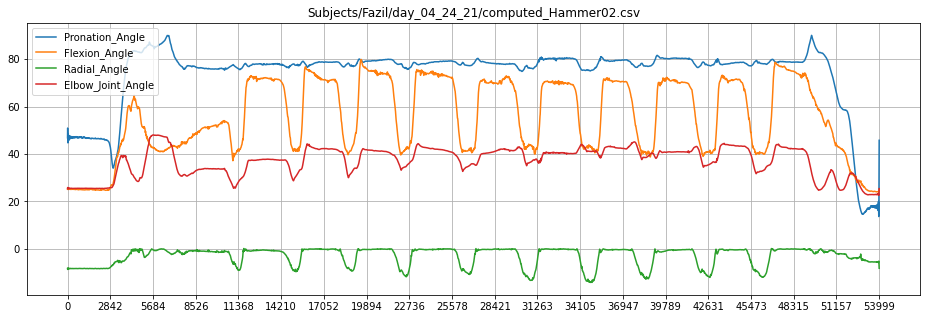

In [104]:
file = 'Subjects/Fazil/day_04_24_21/computed_Hammer02.csv'
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
main_df = pd.read_csv(file,index_col=0)
main_df[angle_lables].plot(figsize=(16,5),title=file,grid=True,xticks=np.linspace(main_df.index[0],main_df.index[-1],20))

# Signal Analysis

In [146]:
df = main_df[37500:37500+10000]

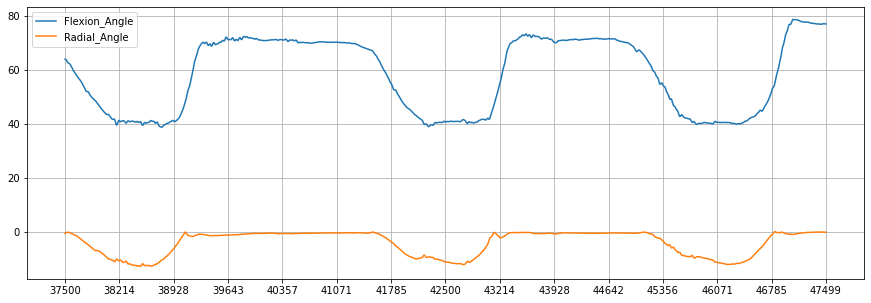

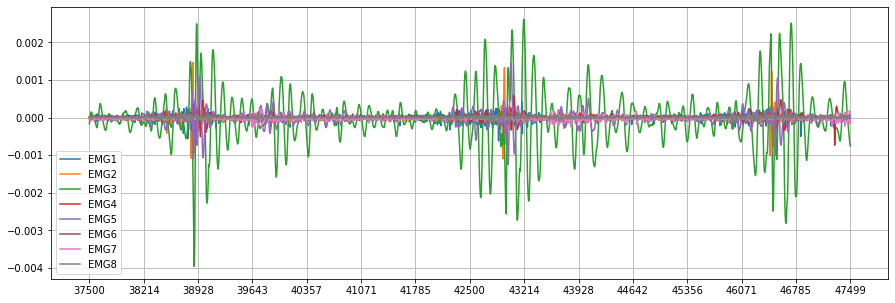

<AxesSubplot:>

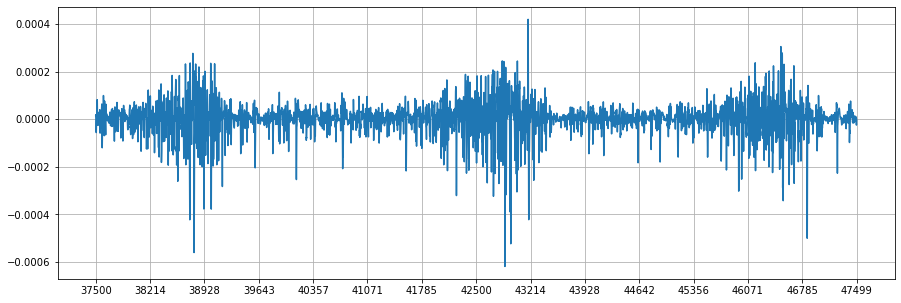

In [147]:
emg1 = df['EMG1']
y = np.array(emg1)
df[angle_lables[1:3]].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)
plt.show()
df[emg_labels].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)
plt.show()
df['EMG1'].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)

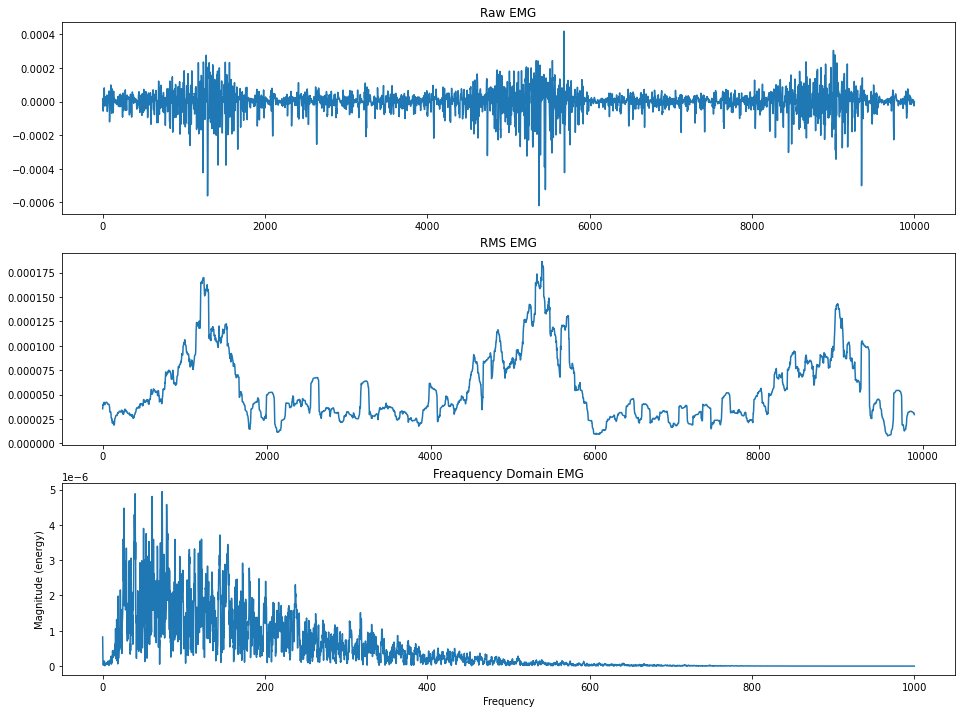

In [148]:
single_analyse(y,100)

## Window Signal Analysis

In [154]:
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
emg = df[emg_labels]
y_win = np.array(emg)

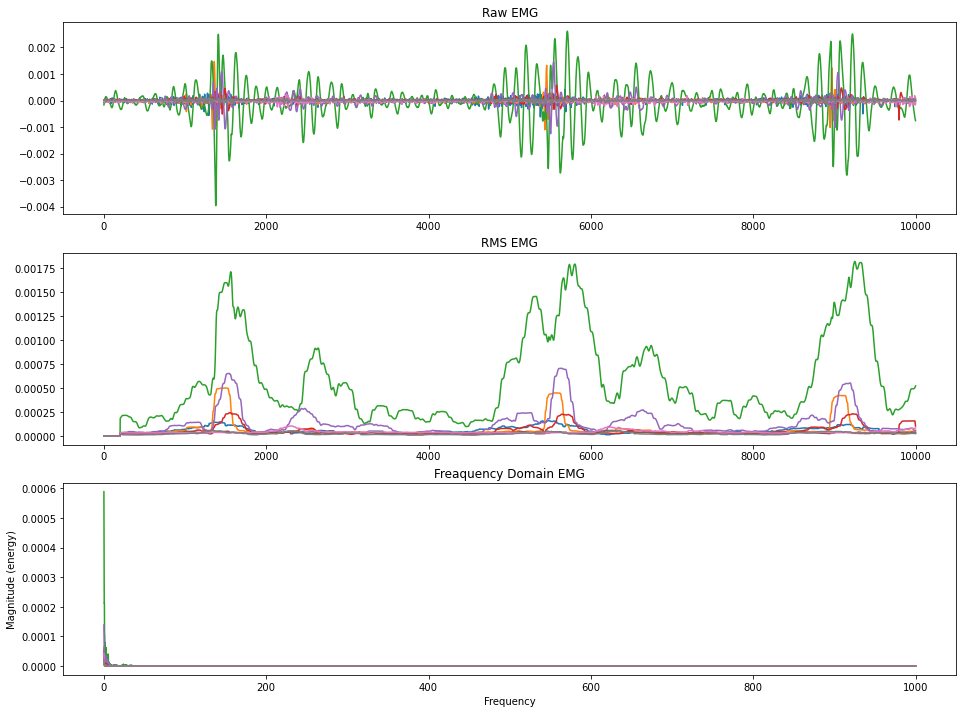

In [155]:
window_analyse(y_win,200)